In [99]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
# 1. Summarizing Data
# Import qb data

qb_data = pd.read_csv('C:/Users/corri/OneDrive/Desktop/qb_stats.csv')
qb_data.head()

,name,team,games,att,cmp,comp_pct,yds,ypa,td,int,sack,loss,rating
0,Ryan Tannehill,TEN,12.0,286.0,201.0,70.3,2742.0,9.6,22.0,6.0,31.0,212.0,117.5
1,Drew Brees,NO,11.0,378.0,281.0,74.3,2979.0,7.9,27.0,4.0,12.0,89.0,116.3
2,Lamar Jackson,BAL,15.0,401.0,265.0,66.1,3127.0,7.8,36.0,6.0,23.0,106.0,113.3
3,Kirk Cousins,MIN,15.0,444.0,307.0,69.1,3603.0,8.1,26.0,6.0,28.0,206.0,107.4
4,Russell Wilson,SEA,16.0,516.0,341.0,66.1,4110.0,8.0,31.0,5.0,48.0,319.0,106.3


In [28]:
# 1a. Find the mean of each numerical column of data

print("The mean for each numerical column:", "\nGames:", qb_data.games.mean(),
      "\nPass attempts:", qb_data.att.mean(), "\nPass completions:", qb_data.cmp.mean(),
      "\nCompletion percentage:", qb_data.comp_pct.mean(), "\nNumber of yards:", qb_data.yds.mean(),
      "\nYards per attempt:", qb_data.ypa.mean(), "\nTouchdowns:", qb_data.td.mean(),
      "\nInterceptions:", qb_data.int.mean(), "\nSacks:", qb_data.sack.mean(),
      "\nLoss:", qb_data.loss.mean(), "\nQuarterback rating:", qb_data.rating.mean())

The mean for each numerical column: 
Games: 14.125 
Pass attempts: 478.40625 
Pass completions: 306.5625 
Completion percentage: 64.296875 
Number of yards: 3515.0625 
Yards per attempt: 7.375 
Touchdowns: 22.375 
Interceptions: 10.34375 
Sacks: 32.3125 
Loss: 217.09375 
Quarterback rating: 93.3875


In [29]:
# 1b. Find the standard deviation of each numerical column of data
# I used the NumPy library because its default is the population standard deviation and I believe we're working with the
# starting QB population of 2019

print("The population standard deviation for each numerical column:",
     "\nGames:", np.std(qb_data.games), "\nPass attempts:", np.std(qb_data.att),
      "\nPass completions:", np.std(qb_data.cmp), "\nCompletion percentage:", np.std(qb_data.comp_pct),
      "\nNumber of yards:", np.std(qb_data.yds), "\nYards per attempt:", np.std(qb_data.ypa),
      "\nTouchdowns:", np.std(qb_data.td), "\nInterceptions:", np.std(qb_data.int),
      "\nSacks:", np.std(qb_data.sack), "\nLoss:", np.std(qb_data.loss),
      "\nQuarterback rating:", np.std(qb_data.rating))

The population standard deviation for each numerical column: 
Games: 2.368411915187052 
Pass attempts: 108.6222984057026 
Pass completions: 67.84400189957842 
Completion percentage: 3.570406522284962 
Number of yards: 839.012437985129 
Yards per attempt: 0.7842193570679061 
Touchdowns: 6.158073968376801 
Interceptions: 5.747876645988499 
Sacks: 10.348422283130892 
Loss: 69.67126352333148 
Quarterback rating: 10.880623546010588


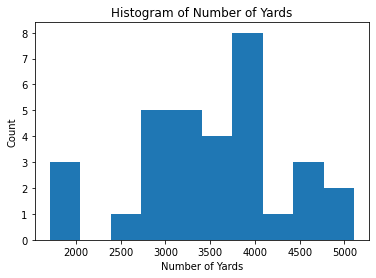

In [41]:
# 1c. Create a histogram of the number of yards

plt.hist(qb_data.yds)
plt.title('Histogram of Number of Yards')
plt.xlabel('Number of Yards')
plt.ylabel('Count')

plt.show()

The outlier is 6.
 24    6.0
Name: td, dtype: float64


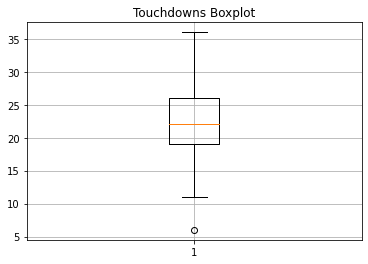

In [52]:
# 1d. Create a boxplot of the number of touchdowns

plt.boxplot(qb_data.td)
plt.title('Touchdowns Boxplot')
plt.grid()

# find 1st quartile
q1 = np.quantile(qb_data.td, 0.25)

# find 3rd quartile and median
q3 = np.quantile(qb_data.td, 0.75)
med = np.median(qb_data.td)

# find interquartile range (IQR)
iqr = q3 - q1

# find upper and lower whiskers
upper_bound = q3+(1.5 * iqr)
lower_bound = q1 - (1.5 * iqr)

# find outliers
outliers = qb_data[(qb_data.td <= lower_bound) | (qb_data.td >= upper_bound)]
print("The outlier is 6.\n", outliers.td)

plt.show()

In [108]:
# 2. Calculating Probabilities from Data
# Import survey data

s_df = pd.read_csv('C:/Users/corri/OneDrive/Desktop/survey_data.csv')
s_df.head()

,hair_color,eye_color
0,brown,brown
1,brown,brown
2,brown,blue
3,brown,green
4,brown,brown


In [58]:
# 2a. Probability a college student has brown hair

brown_hair = len(s_df[s_df['hair_color'] == 'brown'])
p_brown_hair = brown_hair/len(s_df)

print("The probability of a student having brown hair is", p_brown_hair)

The probability of a studen having brown hair is 0.5123456790123457


In [60]:
# 2b. Probability a college student has blue eyes

blue_eyes = len(s_df[s_df['eye_color'] == 'blue'])
p_blue_eyes = blue_eyes/len(s_df)

print("The probability of a student having blue eyes is", p_blue_eyes)

The probability of a student having blue eyes is 0.24691358024691357


In [127]:
# 2c. Probability a college student has blue eyes given they have brown hair

h_brown = s_df.loc[s_df['hair_color'] == 'brown']

print("The probability of a college student having blue eyes given they have brown hair"
      "\nis", len(h_brown.loc[h_brown['eye_color'] == 'blue']) / len(h_brown))

The probability of a college student having blue eyes given they have brown hair
is 0.21686746987951808


In [128]:
# 2d. Probability a college student has brown hair given they have blue eyes

e_blue = s_df.loc[s_df['eye_color'] == 'blue']

print("The probability of a college student having brown hair given they have blue eyes"
      "\nis", len(e_blue.loc[e_blue['hair_color'] == 'brown']) / len(e_blue))

The probability of a college student having brown hair given they have blue eyes
is 0.45


In [106]:
# 2e. 

print("The results indicate that college students that have brown hair and blue eyes are independent of one another."
      "\nThis is because the probabilities for c and d are very/fairly close to a and b.")

The results indicate that college students that have brown hair and blue eyes are independent of one another.
This is because the probabilities for c and d are very/fairly close to a and b.


In [122]:
# 2f. Create a bar graph of the hair color and eye color of the students
# create new dataframe to plot

df_count = s_df.groupby(['hair_color', 'eye_color'], as_index = False).size()
df_count.head()

,hair_color,eye_color,size
0,black,black,6
1,black,blue,1
2,black,brown,11
3,black,green,4
4,blond,blue,3


<AxesSubplot:xlabel='hair_color'>

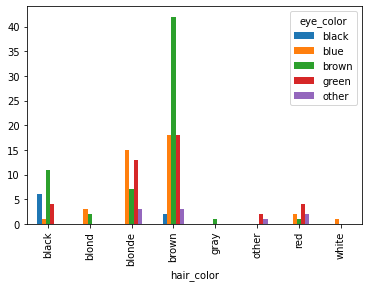

In [130]:
# 2f. Create bar plot

df_count.pivot(index = 'hair_color', columns = 'eye_color', values = 'size').plot.bar(stacked = False)